# Import Libraries
- Pandas and Numpy have been used for Data Manipulation and numerical Calculations
- Matplotlib and Seaborn have been used for Data visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Train Data

In [2]:
path=r'C:\Users\hp\OneDrive\DATASCIENCE\INTERNSHIP\INTERN CAREER(Machine Learning)\Titanic\train.csv'
df=pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Quick checks**

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Categorical columns
d1=dict(df.dtypes)
cat=[i for i in d1 if d1[i]=='object'] # for categorical data
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [6]:
# Numericals columns
d1=dict(df.dtypes)
num=[i for i in d1 if d1[i]!='object'] # for numerical data
num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

**Missing value analysis**

In [7]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
ids=df['PassengerId']
ids

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [9]:
col=['PassengerId','Cabin']
df=df.drop(col,axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Categorical to Numerical**

In [10]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols[1:]
for i in cat_cols[1:]:
    from sklearn.preprocessing import LabelEncoder # read the package
    le=LabelEncoder() #save the package
    for i in df:
        df[i]=le.fit_transform(df[i])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,108,1,28,1,0,523,18,2
1,1,0,190,0,51,1,0,596,207,0
2,1,2,353,0,34,0,0,669,41,2
3,1,0,272,0,47,1,0,49,189,2
4,0,2,15,1,47,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,2
887,1,0,303,0,24,0,0,14,153,2
888,0,2,413,0,88,1,2,675,131,2
889,1,0,81,1,34,0,0,8,153,0


In [11]:
df=df.fillna(method='bfill')

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**Outlier Analysis**

In [13]:
Q1=np.percentile(df['Fare'],25) #lb
Q3=np.percentile(df['Fare'],75) #ub
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
c1=df['Fare']<lb
c2=df['Fare']>ub
c=c1|c2
outlier_df=df[c]
outlier_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [14]:
Q1=np.percentile(df['Fare'],25) #lb
Q3=np.percentile(df['Fare'],75) #ub
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
c1=df['Fare']>lb
c2=df['Fare']<ub
c=c1&c2
non_outlier_df=df[c]
non_outlier_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,108,1,28,1,0,523,18,2
1,1,0,190,0,51,1,0,596,207,0
2,1,2,353,0,34,0,0,669,41,2
3,1,0,272,0,47,1,0,49,189,2
4,0,2,15,1,47,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,2
887,1,0,303,0,24,0,0,14,153,2
888,0,2,413,0,88,1,2,675,131,2
889,1,0,81,1,34,0,0,8,153,0


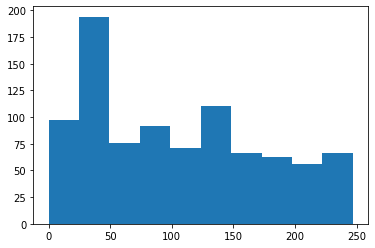

In [15]:
plt.hist(df['Fare'])
plt.hist(outlier_df['Fare'])
plt.show()


**Feature selection**

In [16]:
x=df.drop('Survived',axis=1)
y=df['Survived']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              random_state=42,
                                              test_size=0.25)

**Model**

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)



LogisticRegression()

**Hypertunning Model**

In [18]:
from sklearn.model_selection import GridSearchCV,cross_val_score
log_params=[keys for keys in log_reg.get_params()]

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'], #l1=lasso & l2=Ridge
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(log_reg,  # Base model
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

df

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best params: {'C': 100, 'max_iter': 200, 'penalty': 'l2'}
best train accuracy: 0.7978902480080798


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,108,1,28,1,0,523,18,2
1,1,0,190,0,51,1,0,596,207,0
2,1,2,353,0,34,0,0,669,41,2
3,1,0,272,0,47,1,0,49,189,2
4,0,2,15,1,47,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...
886,0,1,548,1,35,0,0,101,85,2
887,1,0,303,0,24,0,0,14,153,2
888,0,2,413,0,88,1,2,675,131,2
889,1,0,81,1,34,0,0,8,153,0


# Test Data

In [19]:
path=r'C:\Users\hp\OneDrive\DATASCIENCE\INTERNSHIP\INTERN CAREER(Machine Learning)\Titanic\test.csv'
test_df=pd.read_csv(path)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
col=['PassengerId','Cabin']
test_df=test_df.drop(col,axis=1)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [21]:
cat_cols=test_df.select_dtypes(include='object').columns
cat_cols[1:]
for i in cat_cols[1:]:
    from sklearn.preprocessing import LabelEncoder # read the package
    le=LabelEncoder() #save the package
    for i in test_df:
        test_df[i]=le.fit_transform(test_df[i])
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,206,1,44,0,0,152,24,1
1,2,403,0,60,1,0,221,5,2
2,1,269,1,74,0,0,73,41,1
3,2,408,1,34,0,0,147,34,2
4,2,178,0,27,1,1,138,46,2
...,...,...,...,...,...,...,...,...,...
413,2,353,1,79,0,0,267,31,2
414,0,283,0,51,0,0,324,154,0
415,2,332,1,50,0,0,346,9,2
416,2,384,1,79,0,0,220,31,2


**Model Prediction**

In [22]:
y_pred_log=log_reg.predict(test_df)


In [23]:
titanic_test_df=pd.DataFrame(zip(ids,y_pred_log),
                          columns=['PassengerId','Survived'])

In [25]:
d={'N':0,'Y':1}
titanic_test_df['Survived']=titanic_test_df['Survived'].map(d)
titanic_test_df

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
413,414,0
414,415,1
415,416,0
416,417,0


In [29]:
titanic_test_df.to_csv('titanic_test.csv',index=False)